# Importing Libraries

In [117]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


# Fetching Data 

In [119]:
# Fetch intraday data (5-minute intervals) for the past 5 trading days
ticker = "AAPL"
data = yf.download(ticker, period="5d", interval="5m")

# Ensure data has been fetched
if data.empty:
    print("No data retrieved. Please check the ticker or connection.")
else:
    # Save to a CSV file if needed
    data.to_csv(f"{ticker}_last_week.csv")


[*********************100%***********************]  1 of 1 completed


In [121]:
print(data)

Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2024-12-17 14:30:00+00:00  250.770004  251.250000  249.789993  250.134995   
2024-12-17 14:35:00+00:00  251.399994  251.549896  250.589996  250.759995   
2024-12-17 14:40:00+00:00  252.779999  252.860397  251.309998  251.399994   
2024-12-17 14:45:00+00:00  252.570007  252.809998  252.250000  252.750000   
2024-12-17 14:50:00+00:00  252.595001  252.979996  252.509995  252.589996   
...                               ...         ...         ...         ...   
2024-12-23 20:35:00+00:00  254.514999  254.699997  254.449997  254.505005   
2024-12-23 20:40:00+00:00  254.740005  254.871002  254.490005  254.514999   
2024-12-23 20:45:00+00:00  254.899994  254.940002  254.740005  254.750000   
2024-12-23 20:50:00+00:00  255.360001  255.389999  254.899994  254.914993   

# Cleaning The Data 

In [123]:
#Step 1 : Clean and preprocess the data
data.dropna(inplace=True)

# Calculation

Calculate Rolling Volatility

In [125]:
 if 'Adj Close' not in data.columns:
    data['Adj Close'] = data['Close']  
data['Returns'] = data['Adj Close'].pct_change()
data['Rolling Volatility'] = data['Returns'].rolling(window=20).std()


Calculate VWAP

In [127]:
print((data['High'] + data['Low'] + data['Adj Close']).shape)


(390, 391)


In [129]:
if all(col in data.columns for col in [('High', 'AAPL'), ('Low', 'AAPL'), ('Adj Close', '')]):
    data[('Typical Price', 'AAPL')] = (data[('High', 'AAPL')] + data[('Low', 'AAPL')] + data[('Adj Close', '')]) / 3
    data[('Cumulative TP Volume', 'AAPL')] = (data[('Typical Price', 'AAPL')] * data[('Volume', 'AAPL')]).cumsum()
    data[('Cumulative Volume', 'AAPL')] = data[('Volume', 'AAPL')].cumsum()
    data[('VWAP', 'AAPL')] = data[('Cumulative TP Volume', 'AAPL')] / data[('Cumulative Volume', 'AAPL')]


Verifying The Multiindex Structure

In [163]:
print(data.columns)  # View all columns with their levels
print(data.head())   # View sample data


Index(['CloseAAPL', 'HighAAPL', 'LowAAPL', 'OpenAAPL', 'VolumeAAPL',
       'Adj_Close', 'Returns', 'Rolling_Volatility', 'Typical_PriceAAPL',
       'Cumulative_TP_VolumeAAPL', 'Cumulative_VolumeAAPL', 'VWAPAAPL', 'MA20',
       'MA50', 'Volume_Change'],
      dtype='object')
                            CloseAAPL    HighAAPL     LowAAPL    OpenAAPL  \
Datetime                                                                    
2024-12-17 14:30:00+00:00  250.770004  251.250000  249.789993  250.134995   
2024-12-17 14:35:00+00:00  251.399994  251.549896  250.589996  250.759995   
2024-12-17 14:40:00+00:00  252.779999  252.860397  251.309998  251.399994   
2024-12-17 14:45:00+00:00  252.570007  252.809998  252.250000  252.750000   
2024-12-17 14:50:00+00:00  252.595001  252.979996  252.509995  252.589996   

                           VolumeAAPL   Adj_Close   Returns  \
Datetime                                                      
2024-12-17 14:30:00+00:00     2105605  250.770004       

Calculate Moving Average (20 and 50 periods)

In [133]:
 data['MA20'] = data['Adj Close'].rolling(window=20).mean()
 data['MA50'] = data['Adj Close'].rolling(window=50).mean()

Identify Unusual Trading Patterns

In [135]:
data['Volume Change'] = data['Volume'].pct_change()
unusual_patterns = data[data['Volume Change'] > data['Volume Change'].mean() + 2 * data['Volume Change'].std()]

Key Statistical Measures

In [137]:
statistics = {
        'Standard Deviation': data['Adj Close'].std(),
        'Skewness': data['Adj Close'].skew()
    }

# Visualization

Plotting Rolling Votability

In [173]:
# Define a dictionary mapping current names to original names
rename_mapping = {
    'CloseAAPL': 'Close_AAPL',
    'HighAAPL': 'High_AAPL',
    'LowAAPL': 'Low_AAPL',
    'OpenAAPL': 'Open_AAPL',
    'VolumeAAPL': 'Volume_AAPL',
    'AdjClose': 'Adj Close',
    'Returns': 'Returns',
    'RollingVolatility': 'Rolling Volatility',
    'TypicalPriceAAPL': 'Typical Price_AAPL',
    'CumulativeTPVolumeAAPL': 'Cumulative TP Volume_AAPL',
    'CumulativeVolumeAAPL': 'Cumulative Volume_AAPL',
    'VWAPAAPL': 'VWAP_AAPL',
    'MA20': 'MA20',
    'MA50': 'MA50',
    'VolumeChange': 'Volume Change',
}

# Rename columns
data.rename(columns=rename_mapping, inplace=True)

# Verify the column names
print(data.columns)


Index(['Close_AAPL', 'High_AAPL', 'Low_AAPL', 'Open_AAPL', 'Volume_AAPL',
       'Adj Close', 'Returns', 'Rolling Volatility', 'Typical Price_AAPL',
       'Cumulative TP Volume_AAPL', 'Cumulative Volume_AAPL', 'VWAP_AAPL',
       'MA20', 'MA50', 'Volume Change'],
      dtype='object')


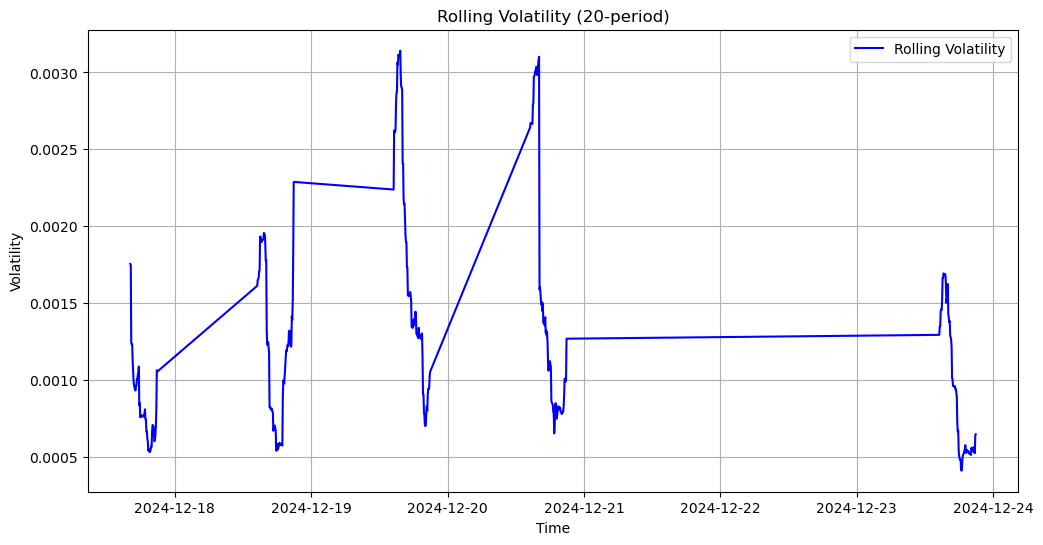

In [177]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Rolling Volatility'], label='Rolling Volatility', color='blue')
plt.title('Rolling Volatility (20-period)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()


Plotting VWAP

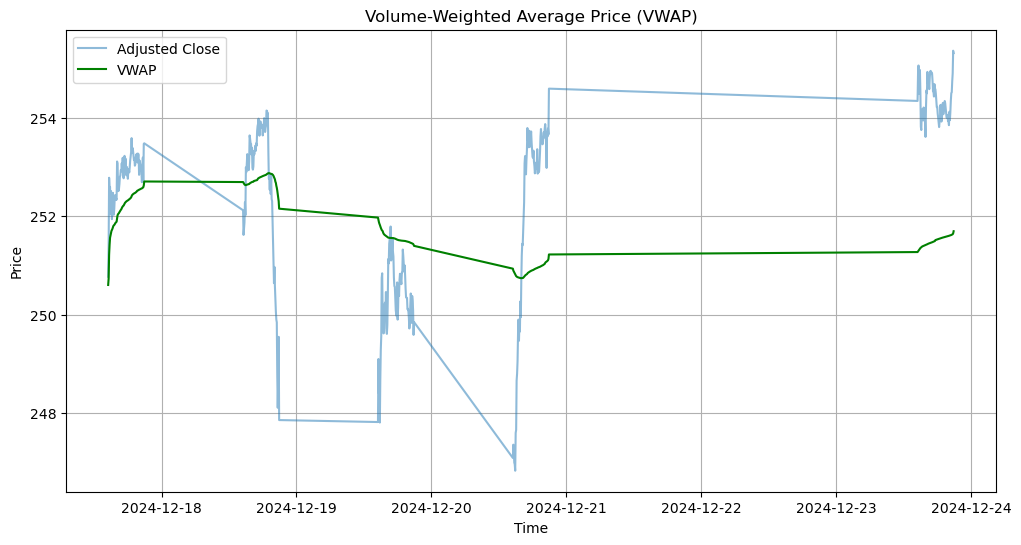

In [186]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Adj Close'], label='Adjusted Close', alpha=0.5)
if 'VWAP_AAPL' in data.columns:  # Check if VWAP exists (after renaming to 'VWAP_AAPL' if needed)
    plt.plot(data.index, data['VWAP_AAPL'], label='VWAP', color='green')
plt.title('Volume-Weighted Average Price (VWAP)')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid()

# Show the plot
plt.show()


Plot Moving Averages

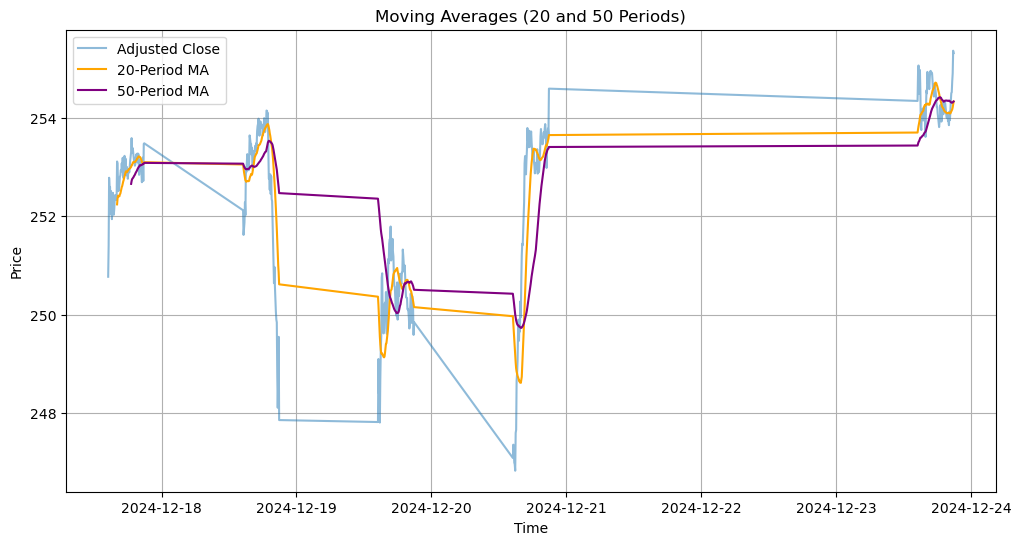

In [188]:
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Adj Close'], label='Adjusted Close', alpha=0.5)
    plt.plot(data.index, data['MA20'], label='20-Period MA', color='orange')
    plt.plot(data.index, data['MA50'], label='50-Period MA', color='purple')
    plt.title('Moving Averages (20 and 50 Periods)')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()
    plt.show()

Correlation Visualition

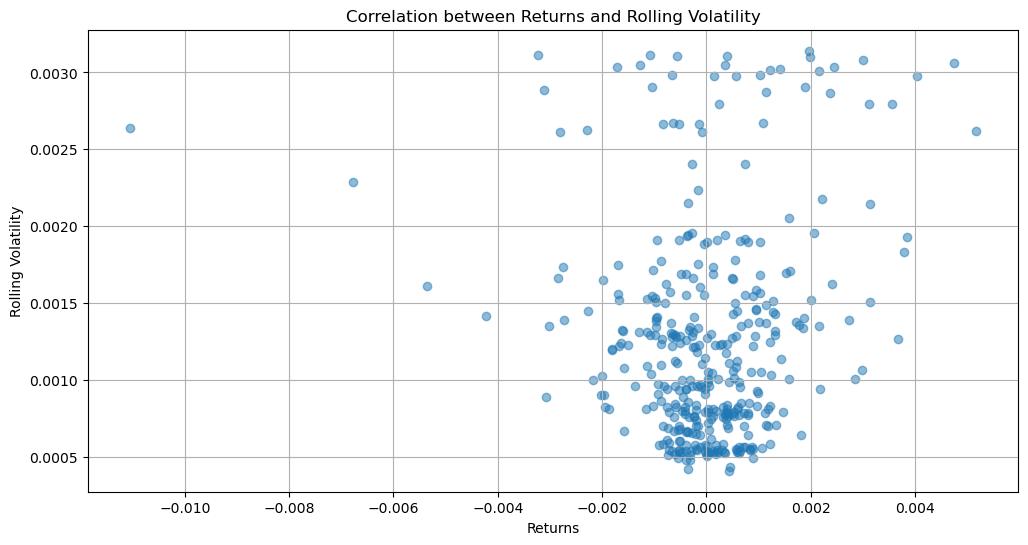

In [191]:
    plt.figure(figsize=(12, 6))
    plt.scatter(data['Returns'], data['Rolling Volatility'], alpha=0.5)
    plt.title('Correlation between Returns and Rolling Volatility')
    plt.xlabel('Returns')
    plt.ylabel('Rolling Volatility')
    plt.grid()
    plt.show()

# Present Findings

Data Cleaning Approach

In [196]:
    print("Data Cleaning Approach:")
    print("- Removed missing values.")

Data Cleaning Approach:
- Removed missing values.


Key Findings

In [199]:
    print("Key Findings:")
    print(f"- Standard Deviation of Adj Close: {statistics['Standard Deviation']}")
    print(f"- Skewness of Adj Close: {statistics['Skewness']}")

Key Findings:
- Standard Deviation of Adj Close: 1.814599590857119
- Skewness of Adj Close: -0.9359841365769578


Most Significant Pattern

In [202]:
    print("Most Significant Patterns:")
    print("- Unusual trading patterns identified based on significant volume changes.")
    print(unusual_patterns)


Most Significant Patterns:
- Unusual trading patterns identified based on significant volume changes.
Price                           Close        High         Low        Open  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Datetime                                                                    
2024-12-17 16:05:00+00:00  253.110397  253.169998  252.250000  252.350006   
2024-12-18 16:25:00+00:00  253.320007  253.360001  252.929993  253.029999   
2024-12-18 17:05:00+00:00  253.830002  253.889999  253.669998  253.734604   
2024-12-18 18:40:00+00:00  254.145004  254.160004  253.794998  253.840500   
2024-12-18 19:20:00+00:00  252.850006  252.889893  251.539993  252.559998   
2024-12-20 14:30:00+00:00  247.089996  248.720001  247.059998  248.119995   
2024-12-20 16:25:00+00:00  251.990005  252.000000  251.600006  251.669998   
2024-12-20 20:50:00+00:00  253.660004  253.830002  252.960007  253.789993   
2024-12-20 20:55:00+00:00  254.589996  255.000000  

Technical Challenges

In [205]:
    print("Technical Challenges:")
    print("- Handling missing columns (e.g., Adj Close).\n- Identifying and preprocessing unusual patterns.")


Technical Challenges:
- Handling missing columns (e.g., Adj Close).
- Identifying and preprocessing unusual patterns.
